In [5]:
import numpy as np
from garuda.ops import obb_to_aa
import rasterio
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


In [9]:
obb_label_path_1 = "../data/region_performace/bihar_0.25/labels/9750003_2967894.txt"
#read the file make list
obb_label_1=[]
with open(obb_label_path_1,'r') as file:
    for line in file:
        obb_label_1.append([float(value) for value in line.strip().split()])

print(obb_label_1)        


[[2.0, 0.454192, 0.515097, 0.456227, 0.495021, 0.434588, 0.492828, 0.432553, 0.512903], [2.0, 0.454961, 0.5156, 0.458115, 0.495085, 0.415413, 0.488519, 0.412259, 0.509034], [2.0, 0.593175, 0.071583, 0.594708, 0.053208, 0.552255, 0.049666, 0.550722, 0.068041]]


In [10]:
obb_label_path_2 = "../data/region_performace/bihar_0.25/labels/9304223_2877087.txt"
aa_label_2 = obb_to_aa(obb_label_path_2)
print(aa_label_2)

[[2.        0.0932445 0.551485  0.020385  0.034326 ]
 [2.        0.166104  0.4097685 0.023572  0.037711 ]]


0.454192
0.454961
0.593175


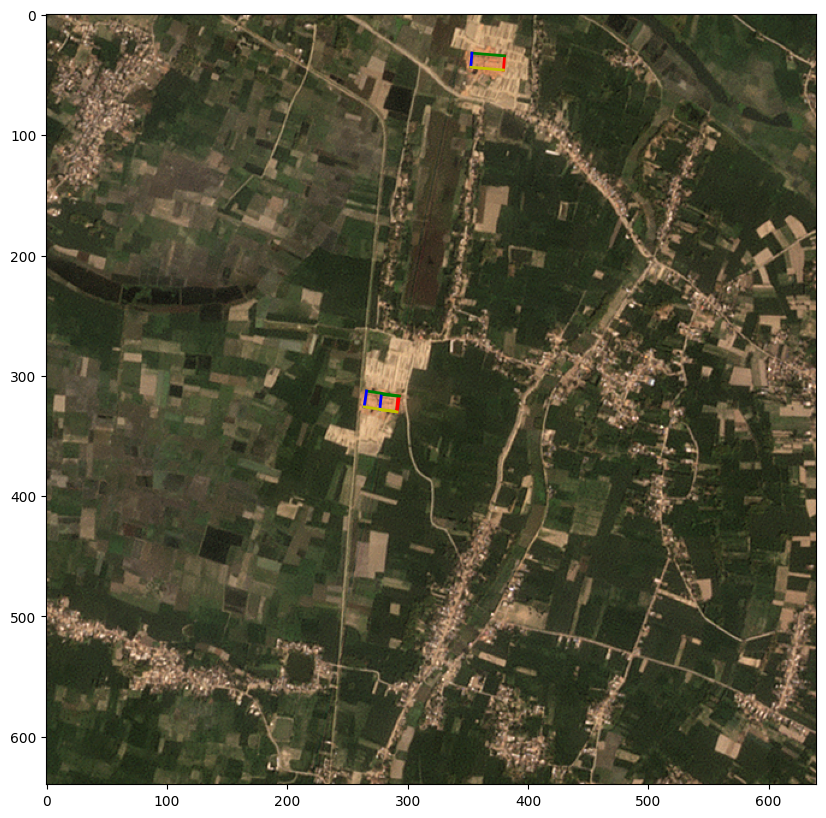

In [10]:
tiff_file = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/region_performace/bihar_0.25/images/9750003_2967894.tif"
image_size=640

with rasterio.open(tiff_file) as src:
    red=src.read(1)
    green=src.read(2)
    blue=src.read(3)
    image = np.dstack((red, green, blue))
    img_width = src.width
    img_height = src.height
    fig, ax = plt.subplots(figsize=(10, 10))

    ax.imshow(image)
    for bbox in obb_label_1:
        class_id,x1,y1,x2,y2,x3,y3,x4,y4=bbox
        print(x1)
        x1_1=x1*image_size
        y1_1=y1*image_size
        x2_1=x2*image_size
        y2_1=y2*image_size
        x3_1=x3*image_size
        y3_1=y3*image_size
        x4_1=x4*image_size
        y4_1=y4*image_size

        ax.plot([x1_1, x2_1], [y1_1, y2_1], color='r', linewidth=2)
        ax.plot([x2_1, x3_1], [y2_1, y3_1], color='g', linewidth=2)
        ax.plot([x3_1, x4_1], [y3_1, y4_1], color='b', linewidth=2)
        ax.plot([x4_1, x1_1], [y4_1, y1_1], color='y', linewidth=2)